# Módulo 1 - Analisando dados de saude com python e pandas

No curso vamos analisar e manipular dados reais da área da saúde.

Desenvolveremos nosso curso no [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#recent=true), você pode ficar livre para desenvolver em um jupyter notebook, outras plataformas como [Kaggle](https://www.kaggle.com/notebooks) ou com a sua IDE favorita. 

Para desenvolver nosso curso vamos precisar da base de dados, em vídeo mostramos como você pode buscar os dados direto do [DATASUS](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/) (link direto para a [Produção Hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)) usando o sistema Tabnet, mas já deixamos as bases de dados prontas para você baixar:

- [Base de dados no github.](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados)

## Basics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

dados2 = pd.read_csv('dados/A160324189_28_143_208.csv', encoding="ISO-8859-1", 
            skiprows = 3, sep = ";", skipfooter = 12,
           thousands=".", decimal = ",", engine="python")

colunas_usaveis = dados2.mean().index.tolist() # .index retorna um imutável, por isso convertemos pra lista
colunas_usaveis.insert(0, "Unidade da Federação")

usaveis = dados2[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)

usaveis['Total'] = usaveis.sum(axis=1)

ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)

colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 1000000

gastos_do_mais_recente = ordenado_por_total.iloc[:,-1]

## 01. Aquisição e leitura de dados reais

- Introdução
- Produção hospitalar e Pandas
- Visualizações e gráficos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv("dados/A151346189_28_143_208.csv", encoding="ISO-8859-1", 
            skiprows = 3, sep = ";", skipfooter = 12,
           thousands=".", decimal = ",", engine="python")

dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,3.050109e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4.437116e+09


In [3]:
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Abr    4.101366e+07
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
Total       5.993732e+09
Length: 151, dtype: float64

In [74]:
pd.options.display.float_format = "{:.2f}".format

In [75]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [76]:
dados["2008/Ago"].mean()

27800320.306666665

Text(0.5, 0.98, 'asdfasdfASDFAS')

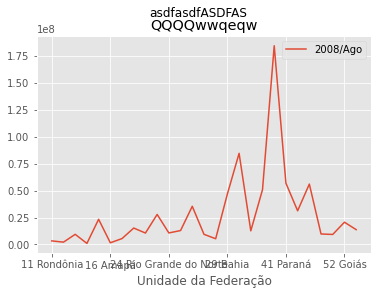

In [7]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

<AxesSubplot:xlabel='Unidade da Federação'>

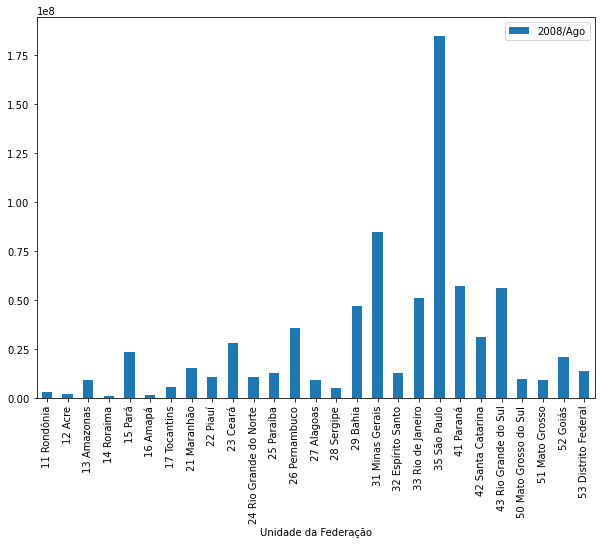

In [11]:
dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize= (10,7))

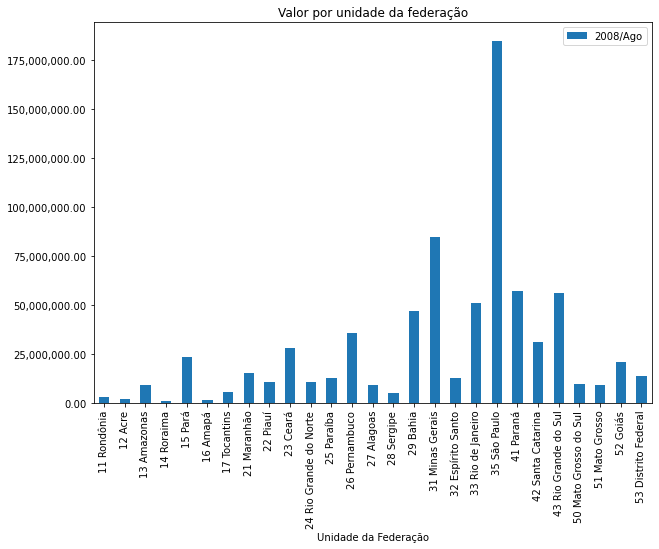

In [13]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize= (10,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show() # pra não mostrar a função/a saída

### Desafios 1

Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.

## 02. Primeiras visualizações de dados

- Entendendo gráficos

In [4]:
dados2 = pd.read_csv('dados/A160324189_28_143_208.csv', encoding="ISO-8859-1", 
            skiprows = 3, sep = ";", skipfooter = 12,
           thousands=".", decimal = ",", engine="python")

dados2.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [5]:
dados2.mean() # tirando as colunas que contém nulo

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Abr    4.000568e+07
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
Total       5.993724e+09
Length: 157, dtype: float64

In [6]:
colunas_usaveis = dados2.mean().index.tolist() # .index retorna um imutável, por isso convertemos pra lista
colunas_usaveis.insert(0, "Unidade da Federação")
#colunas_usaveis

In [7]:
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,3.050109e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4.437116e+09


In [8]:
usaveis = usaveis.set_index("Unidade da Federação")

In [9]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,3.050109e+08
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4.437116e+09


In [10]:
usaveis = usaveis.drop("Total", axis=1)

In [11]:
usaveis.T.idxmax()

Unidade da Federação
11 Rondônia               2018/Mai
12 Acre                   2017/Mar
13 Amazonas               2020/Mai
14 Roraima                2018/Ago
15 Pará                   2020/Mai
16 Amapá                  2020/Mai
17 Tocantins              2014/Out
21 Maranhão               2020/Mai
22 Piauí                  2019/Out
23 Ceará                  2019/Mai
24 Rio Grande do Norte    2019/Mai
25 Paraíba                2019/Mai
26 Pernambuco             2010/Jan
27 Alagoas                2014/Jan
28 Sergipe                2019/Mai
29 Bahia                  2019/Jul
31 Minas Gerais           2008/Jan
32 Espírito Santo         2019/Out
33 Rio de Janeiro         2008/Jan
35 São Paulo              2008/Jan
41 Paraná                 2019/Jul
42 Santa Catarina         2019/Jul
43 Rio Grande do Sul      2019/Jul
50 Mato Grosso do Sul     2019/Ago
51 Mato Grosso            2019/Mai
52 Goiás                  2008/Jan
53 Distrito Federal       2020/Jun
dtype: object

usaveis["2008/Fev"] # busca na colunas
usaveis.loc["12 Acre"] # busca na linha

In [12]:
# o eixo x vai de 0 a 155
# logo, teremos 156 ticks com valores associados.
type(usaveis.T.columns)

pandas.core.indexes.base.Index

In [13]:
usaveis.T.columns[0]

'11 Rondônia'

### Funcao ticks str

https://stackoverflow.com/questions/6682784/reducing-number-of-plot-ticks

https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

In [27]:

[j for i,j in enumerate(ticks)]


[0, 26, 52, 78, 104, 130]

In [16]:
np.linspace(0, 156, 6, dtype=int)

array([  0,  31,  62,  93, 124, 156])

In [76]:
def choose_number_of_str_ticks(approximated_number_of_ticks, df, axis='x'):
    
    # tick labels must be strings for this function to work properly
    # df must be a pandas DataFrame

    # indexing df by columns (if axis ='y') or rows (default)
    pandas_index = df.columns if axis == 'y' else df.index
    pandas_index_length = pandas_index.size
    
    # getting only the integer part with floor division (//)
    divisor = pandas_index_length // approximated_number_of_ticks
    
    # creating list with ticks positions
    ticks = [ item for item in range(pandas_index_length) if item % divisor == 0 ]
    
    # getting the labels of 'ticks' list items
    labels = [ pandas_index[position] for position in ticks ]
    
#     #### TESTES COM NUMPY, FICA MAIS UNIFORME
#     ticks_np = np.linspace(0, pandas_index_length-1, approximated_number_of_ticks, dtype=int) 
#     labels_np = [ pandas_index[position] for position in ticks_np ]
    
#     return ticks, labels
    return ticks, labels

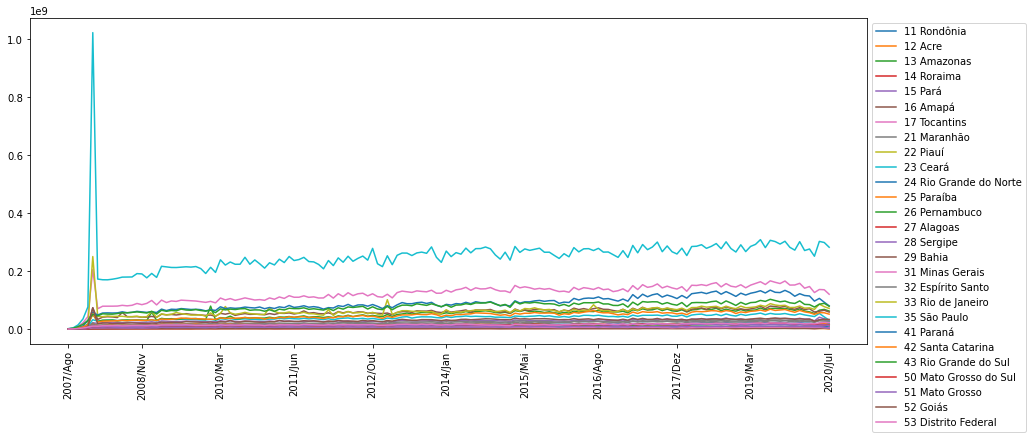

In [67]:
ax = usaveis.T.plot(figsize=(15,6))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=90, ha='center')

# ticks, labels, ticks_np, labels_np = choose_number_of_str_ticks(25, df=usaveis.T, axis='x')
ticks, labels = choose_number_of_str_ticks(25, df=usaveis.T, axis='x')
ax.set_xticks(ticks_np)
ax.set_xticklabels(labels_np)
plt.show()

### Matplotlib text
https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_fontweight

In [51]:
tx = ax.get_xticklabels()[0]

In [53]:
tx.get_fontname()
tx.set_url('https://viz.wtf')

In [55]:
tx.get_url()

'https://viz.wtf'

In [59]:
tx._wrap

False

In [26]:
ticks, labels = choose_number_of_str_ticks(6, df=usaveis.T, axis='x')

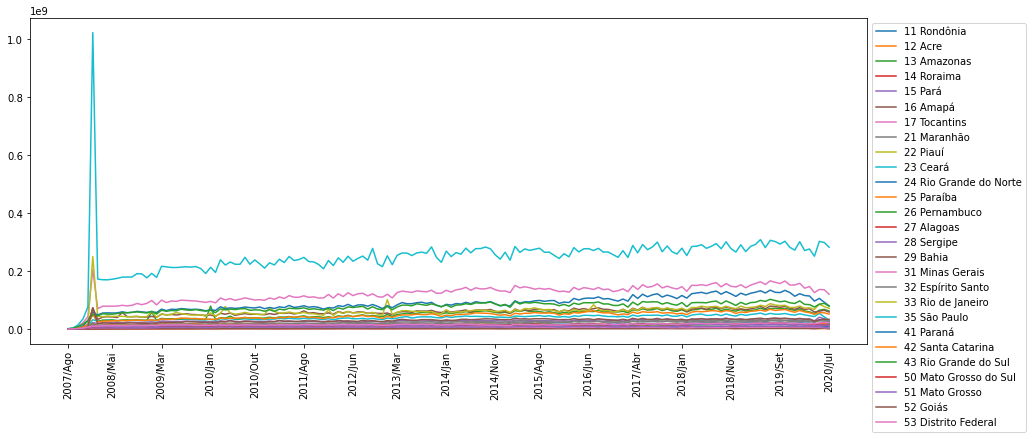

In [75]:
ax = usaveis.T.plot(figsize=(15,6))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=90, ha='center')

ticks, labels = choose_number_of_str_ticks(17, df=usaveis.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
# OU com plt:
# plt.xticks(ticks, labels)

# ax.xaxis.set_major_locator(ticker.IndexLocator(base=6, offset=0))
# ax.xaxis.set_major_locator(ticker.FixedLocator(ticks))
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))
#ax.xaxis.get_ticklocs()

# ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

# ax.tick_params(which='both', width=2)
# ax.tick_params(which='major', length=7)
# ax.tick_params(which='minor', length=4, color='r')

# ax.tick_params(direction='out', length=6, width=2, colors='r',
#                grid_color='r', grid_alpha=0.5)

plt.show()

[Text(0, 0, '2007/Ago'),
 Text(10, 0, '2008/Jun'),
 Text(20, 0, '2009/Abr'),
 Text(30, 0, '2010/Fev'),
 Text(40, 0, '2010/Dez'),
 Text(50, 0, '2011/Out'),
 Text(60, 0, '2012/Ago'),
 Text(70, 0, '2013/Jun'),
 Text(80, 0, '2014/Abr'),
 Text(90, 0, '2015/Fev'),
 Text(100, 0, '2015/Dez'),
 Text(110, 0, '2016/Out'),
 Text(120, 0, '2017/Ago'),
 Text(130, 0, '2018/Jun'),
 Text(140, 0, '2019/Abr'),
 Text(150, 0, '2020/Fev')]

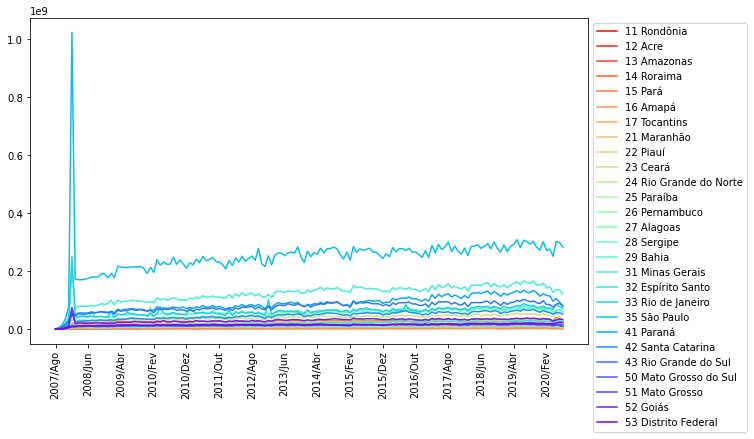

In [302]:
palette = plt.get_cmap("rainbow_r", 27)
# palette = plt.get_cmap("rainbow_r", 3)
ax = usaveis.T.plot(figsize=(10,6), colormap = palette)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90, ha='center')
# ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=30, offset=20))
# ax.xaxis.set_major_locator(ticker.MaxNLocator(min_n_ticks=158))#, nbins=100))
# plt.locator_params(axis='x', nbins=12 , tight = True)
# ax.plot(color="C1")
# plt.get_cmap("viridis")
# plt.show()

# setting ticks for x-axis
ax.set_xticks(ticks)
  
# setting label for y tick
ax.set_xticklabels(labels)

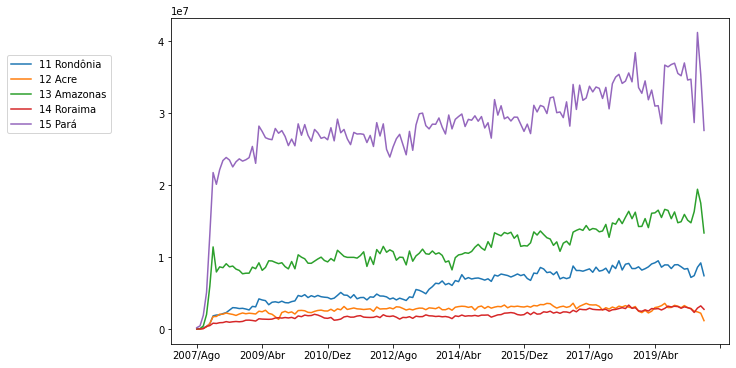

In [45]:
#usaveis.T.iloc[:,:5].plot(figsize=(10,6))
ax = usaveis[:5].T.plot(figsize=(10,6))
ax.legend(loc='upper right', bbox_to_anchor=(-.1,.9))

### Desafios 2



Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada

Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

## 03. Manipulação de dados

- Aleatoriedade e mais explorações
- Ordenação e série temporal

In [5]:
usaveis.T.loc[:,(col for col in usaveis.T if col.startswith("1"))]
# [col for col in df if col.startswith('g')]

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87
...,...,...,...,...,...,...,...
2020/Mar,7174312.31,2859102.06,14773739.41,2813954.05,34749098.46,2286241.46,7025821.12
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13


In [27]:
# a cada iteraçaõ, o seed muda de acordo com uma forma previsivel.
#pseudo randomness

np.random.seed(687942)

usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7587986.90,7594175.34,7573064.95,7225320.39,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37


In [28]:
# criando coluna total
usaveis['Total'] = usaveis.sum(axis=1)

In [29]:
#usaveis.sort_values("Total", ascending=False).iloc[:, [0,-1]]

ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)

ordenado_por_total.iloc[:, [0, -1]].head()

,2007/Ago,2020/Jul
Unidade da Federação,,
35 São Paulo,1665349.90,282709570.31
31 Minas Gerais,971394.37,120467187.34
41 Paraná,554800.22,80320852.69
43 Rio Grande do Sul,1049252.33,78929703.81
33 Rio de Janeiro,469469.34,71540227.33


### Desafios 3

- adicionar coluna com a região de cada estado
- deixar gráfico mais bonito, titulo, legenda, escala e tals
- adicione seu estado aos 5 estados existentes e plote

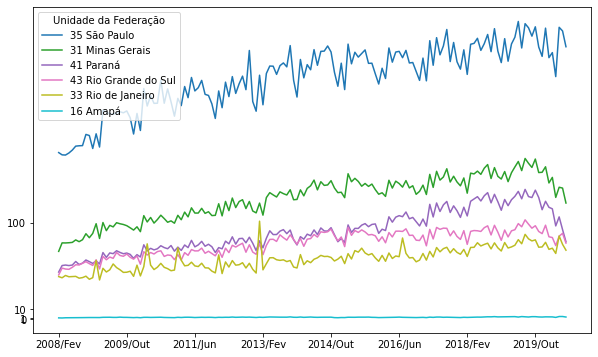

In [58]:
#ordenado_por_total.head(5).T.plot(figsize=(10,6))

#pra nao dar erro pelos valores não numericos das regioes, dropar

gre = plt.get_cmap("tab10", 10) # tab10 ou plasma_r
ax = ordenado_por_total.iloc[[0,1,2,3,4,-1]].T.plot(figsize=(10,6), colormap = gre)

# ticks em escala log
# ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))

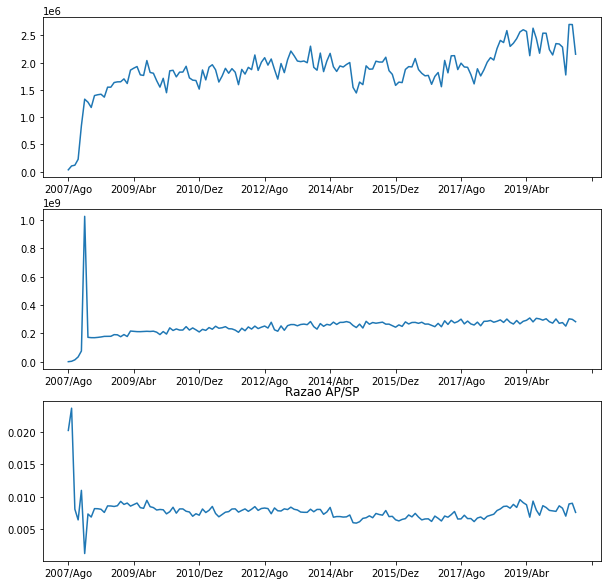

In [3]:
# EXPLORANDO PORQUE O AMAPÁ TÁ TÃO PRÓXIMO DE ZERO? 
df = ordenado_por_total

plt.figure(figsize=(10,10))
ax = plt.subplot(3,1,1)

df.loc['16 Amapá'].plot()

ax = plt.subplot(3,1,2)

#São Paulo retirando os primeiros 12 meses

df.iloc[0,:].plot()

ax = plt.subplot(3,1,3)


razaoAP_SP = (df.loc['16 Amapá'] / df.iloc[0])

razaoAP_SP.plot()
plt.title('Razao AP/SP')

plt.show()

#### CONCLUSAO
# porque há uma diferença na escala de 10O num gráfico que só pega mudanças na escala de 10.

<AxesSubplot:>

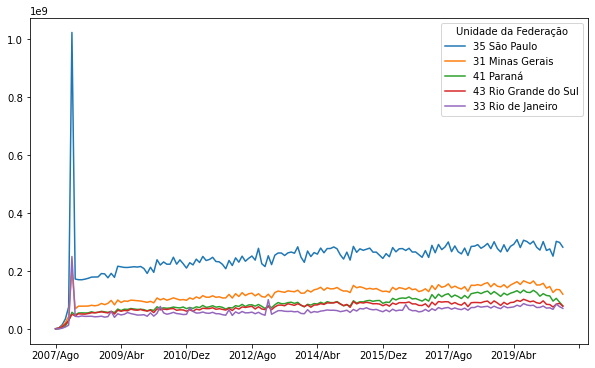

In [32]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))
# %%timeit
# SAIDA: 37.8 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

<AxesSubplot:>

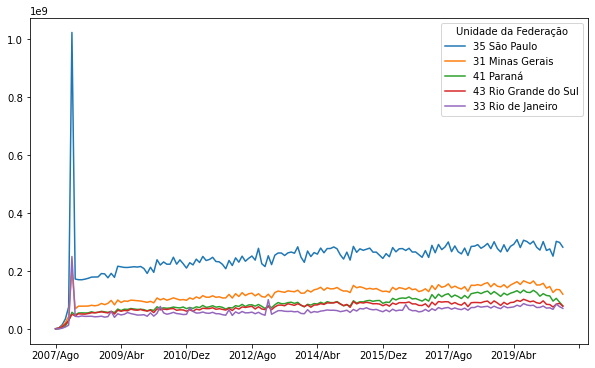

In [33]:
ordenado_por_total[:5].T.plot(figsize=(10,6))
# %%timeit
# 36 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [9]:
colunas_interessadas = ordenado_por_total.columns[6:]

In [10]:
ordenado_por_total = ordenado_por_total[colunas_interessadas]

<AxesSubplot:>

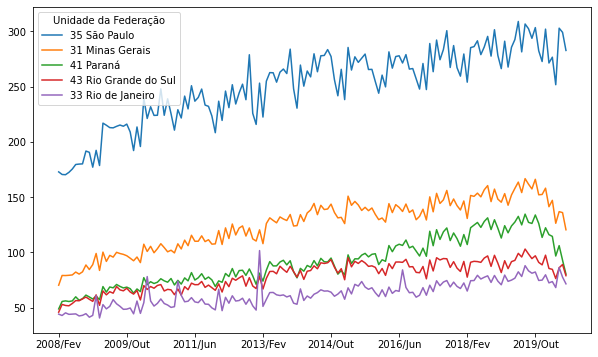

In [28]:
# expondo em milhões
ordenado_por_total = ordenado_por_total / 1000000
ordenado_por_total.head(5).T.plot(figsize=(10,6))

### Desafios 3.2

plotar graficos da região sudeste e ver se o pico se repete

In [46]:
# desafio coluna regiao
dict_estados = { '1': 'Norte',
               '2': 'Nordeste',
               '3': 'Sudeste',
               '4': 'Sul',
               '5': 'Centro Oeste'}

regioes = pd.DataFrame({
    "Unidade da Federação": ordenado_por_total.index ,
    "Regiao": [dict_estados[item[0]] for item in ordenado_por_total.index] ,
})
regioes = regioes.set_index("Unidade da Federação")
regioes.head()

# # criando coluna regiao
# ordenado_por_total.insert(0, 'Regiao', [dict_estados[item[0]] for item in ordenado_por_total.index])
# ordenado_por_total
# ordenado_por_total.drop('Regiao', axis=1, inplace=True)

,Regiao
Unidade da Federação,
35 São Paulo,Sudeste
31 Minas Gerais,Sudeste
41 Paraná,Sul
43 Rio Grande do Sul,Sul
33 Rio de Janeiro,Sudeste


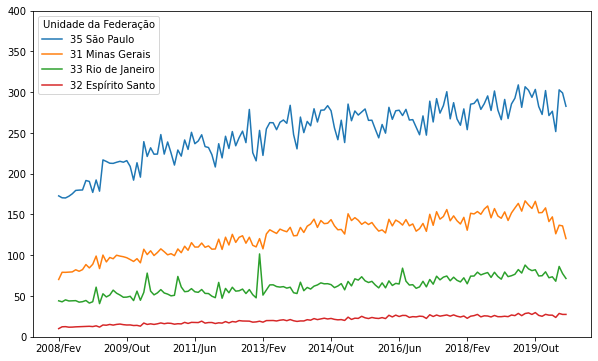

In [49]:
#sudeste = ordenado_por_total.query('Regiao == "Sudeste"').index.to_list()
estados_sudeste = regioes.query('Regiao == "Sudeste"').index.to_list()
ordenado_por_total.loc[estados_sudeste].T.plot(figsize=(10,6), ylim=(0,400))
plt.show()

<AxesSubplot:>

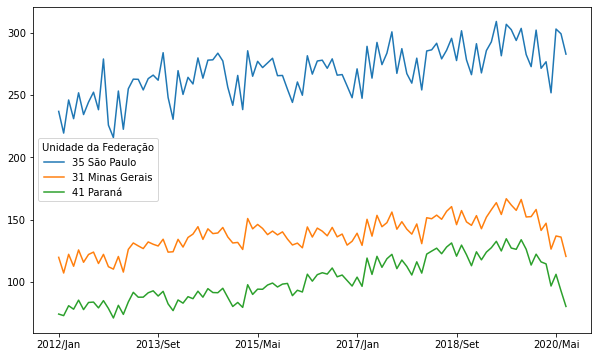

In [37]:
ordenado_por_total.iloc[:3, 47:150].T.plot(figsize=(10,6))

(0.0, 350.0)

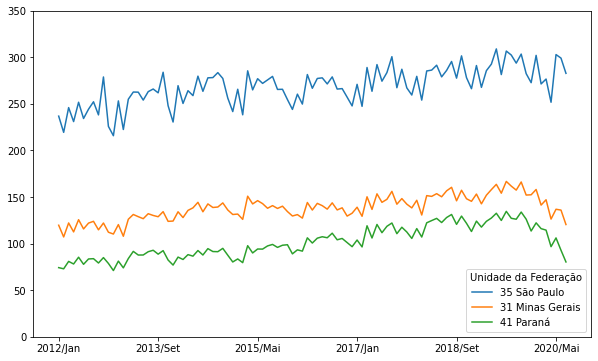

In [59]:
ordenado_por_total.iloc[:3, 47:150].T.plot(figsize=(10,6))
plt.ylim(0,350)

Quando cortamos o gráficos (na horizontal ou vertical) estamos enviesando, distorcendo e manipulando dados, impressões e tempo

## 04. Análise de gráficos e criação de hipótese

- Fugindo de más práticas

## 05. Manipulação e interpretação de gráficos

- Alternativas de visualizações
- Conclusão

- Atraso dos dados nos meses masi recentes
- diferença entre processamento e atendimento na saude
- dados absolutos, seria interessante colocar por habitante

In [3]:
gastos_do_mais_recente = ordenado_por_total.iloc[:,-1]

<AxesSubplot:ylabel='2020/Jul'>

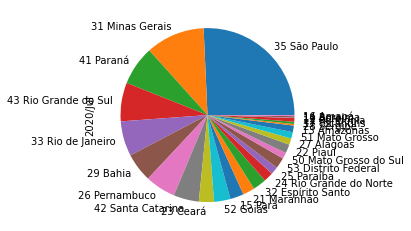

In [5]:
gastos_do_mais_recente.plot(kind='pie')

<AxesSubplot:ylabel='2020/Jul'>

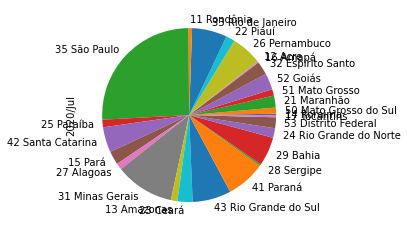

In [44]:
# suffling rows
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

<AxesSubplot:xlabel='Unidade da Federação'>

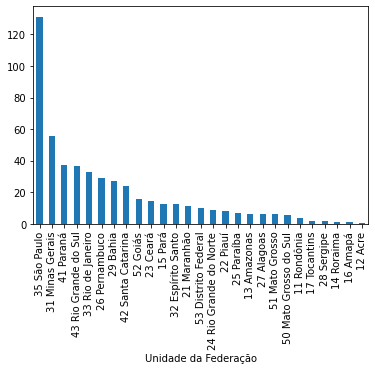

In [6]:
#Gastos relativos ao último, amapá
(gastos_do_mais_recente / gastos_do_mais_recente[-1]).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Unidade da Federação'>

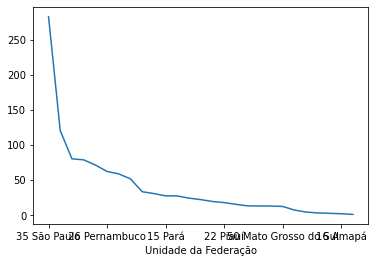

In [369]:
gastos_do_mais_recente.sort_values(ascending=False).plot(kind='line')

# estao fora de ordem porque a ordenação foi feita antes da retirar os primeiros 12 meses? Ou apenas por estarmos só no ultimo mes

### Desafios 5

- [x] tabela de comparação com seu estado e plotar
- colocar grid no plot
- comparar dois estados normalizados por população, comparar dois estados

- tire conclusões, analise os dados e compartilhem no discord, marquem gui, thiago e paulo

- fazer querys no tabnet com outro valor

Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

Super Desafio: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.

Você pode baixar o notebook da aula neste link, não deixe de tentar resolver os exercícios e compartilhar seus resultados e dúvidas no Discord do Bootcamp.


Compartilhe seus resultados no Discord, tire suas dúvidas com nosso time, analise os resultados dos colegas e contribua com outras pessoas. Este é um processo importante na sua jornada de aprendizado e para incentivar, as respostas só serão disponibilizadas após 15 dias do lançamento do módulo corrente.

# Monitoria: Tratando NaN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados = pd.read_csv("dados/A151346189_28_143_208.csv", encoding="ISO-8859-1", 
            skiprows = 3, sep = ";", skipfooter = 12,
           thousands=".", decimal = ",", engine="python")

dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,3.050109e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4.437116e+09


In [23]:
dados.set_index("Unidade da Federação", inplace=True)

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 153 entries, 2008/Jan to Total
dtypes: float64(151), object(2)
memory usage: 32.5+ KB


In [25]:
dados.loc['35 São Paulo':].select_dtypes('object')

,2009/Set,2020/Ago
Unidade da Federação,,
35 São Paulo,220292973.66,346512263.17
41 Paraná,65843824.73,129375911.54
42 Santa Catarina,37380382.93,63972379.36
43 Rio Grande do Sul,66425009.36,101374341.51
50 Mato Grosso do Sul,11997775.92,19241624.02
51 Mato Grosso,10810420.65,17790649.87
52 Goiás,25227845.74,43984702.05
53 Distrito Federal,14487053.32,26526196.39


In [26]:
dados.select_dtypes('object')

,2009/Set,2020/Ago
Unidade da Federação,,
11 Rondônia,3605007.43,10285455.78
12 Acre,NaN,NaN
13 Amazonas,9730634.16,14726443.67
14 Roraima,1701611.25,2826486.18
15 Pará,27967969.22,39911193.02
16 Amapá,2034329.78,2942273.94
17 Tocantins,6542918.14,8240261.38
21 Maranhão,19722895.51,28587541.78
22 Piauí,12247027.29,23210624.20


In [9]:
dados.isnull().sum().sum()

0

In [15]:
dados.replace("-", np.nan).isnull().sum().sum()

2

In [16]:
dados = dados.replace("-", np.nan)

In [28]:
dados.astype('float64').info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 153 entries, 2008/Jan to Total
dtypes: float64(153)
memory usage: 33.5+ KB


In [29]:
dados_float = dados.astype('float64')

In [42]:
dados_float.isnull().sum().sum()

2

In [45]:
dados_float['2009/Set']

Unidade da Federação
11 Rondônia               3.605007e+06
12 Acre                            NaN
13 Amazonas               9.730634e+06
14 Roraima                1.701611e+06
15 Pará                   2.796797e+07
16 Amapá                  2.034330e+06
17 Tocantins              6.542918e+06
21 Maranhão               1.972290e+07
22 Piauí                  1.224703e+07
23 Ceará                  3.447158e+07
24 Rio Grande do Norte    1.321382e+07
25 Paraíba                1.611768e+07
26 Pernambuco             3.797107e+07
27 Alagoas                1.117085e+07
28 Sergipe                6.341601e+06
29 Bahia                  5.383907e+07
31 Minas Gerais           9.691108e+07
32 Espírito Santo         1.538232e+07
33 Rio de Janeiro         5.202772e+07
35 São Paulo              2.202930e+08
41 Paraná                 6.584382e+07
42 Santa Catarina         3.738038e+07
43 Rio Grande do Sul      6.642501e+07
50 Mato Grosso do Sul     1.199778e+07
51 Mato Grosso            1.081042e+07
52 G

In [47]:
dados_float['2009/Set'].fillna(method='backfill')

Unidade da Federação
11 Rondônia               3.605007e+06
12 Acre                   9.730634e+06
13 Amazonas               9.730634e+06
14 Roraima                1.701611e+06
15 Pará                   2.796797e+07
16 Amapá                  2.034330e+06
17 Tocantins              6.542918e+06
21 Maranhão               1.972290e+07
22 Piauí                  1.224703e+07
23 Ceará                  3.447158e+07
24 Rio Grande do Norte    1.321382e+07
25 Paraíba                1.611768e+07
26 Pernambuco             3.797107e+07
27 Alagoas                1.117085e+07
28 Sergipe                6.341601e+06
29 Bahia                  5.383907e+07
31 Minas Gerais           9.691108e+07
32 Espírito Santo         1.538232e+07
33 Rio de Janeiro         5.202772e+07
35 São Paulo              2.202930e+08
41 Paraná                 6.584382e+07
42 Santa Catarina         3.738038e+07
43 Rio Grande do Sul      6.642501e+07
50 Mato Grosso do Sul     1.199778e+07
51 Mato Grosso            1.081042e+07
52 G

In [21]:
dados.fillna(method='backfill')

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,...,8.085026e+06,9.221412e+06,7.493311e+06,8.092260e+06,7.273844e+06,7.652120e+06,8.725531e+06,1.115211e+07,10285455.78,9.291297e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,...,2.874871e+06,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,14726443.67,4.206680e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,...,1.434655e+07,1.601846e+07,1.491375e+07,1.506830e+07,1.350958e+07,1.965859e+07,2.089754e+07,1.934645e+07,14726443.67,1.771655e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,...,3.097113e+06,3.059824e+06,2.912520e+06,2.937346e+06,2.868821e+06,2.752228e+06,3.401864e+06,3.015488e+06,2826486.18,3.050109e+08
4,15 Pará,18864744.11,1.955376e+07,2.193734e+07,2.084283e+07,2.324995e+07,2.324069e+07,2.400222e+07,2.334122e+07,2.517226e+07,...,3.592590e+07,3.434521e+07,3.738434e+07,3.551257e+07,2.821725e+07,3.261754e+07,4.162533e+07,3.843887e+07,39911193.02,4.437116e+09
5,16 Amapá,1120973.34,1.268740e+06,9.746512e+05,1.141137e+06,8.663462e+05,1.440979e+06,1.426659e+06,1.475551e+06,1.651341e+06,...,2.296699e+06,2.333823e+06,2.310196e+06,1.842473e+06,1.705874e+06,2.065055e+06,2.009913e+06,3.249566e+06,2942273.94,2.916380e+08
6,17 Tocantins,3441592.69,4.985689e+06,6.205613e+06,4.984482e+06,5.511002e+06,4.927934e+06,5.445602e+06,5.413710e+06,5.596670e+06,...,7.210731e+06,8.096782e+06,7.022325e+06,7.209046e+06,6.390358e+06,6.697840e+06,7.384807e+06,9.131708e+06,8240261.38,9.999986e+08
7,21 Maranhão,10723506.39,1.355968e+07,1.398514e+07,1.480942e+07,1.450573e+07,1.490809e+07,1.578490e+07,1.519531e+07,1.495128e+07,...,2.944511e+07,3.000306e+07,2.968006e+07,2.877909e+07,2.479293e+07,3.051252e+07,3.309936e+07,3.293650e+07,28587541.78,3.632861e+09
8,22 Piauí,7985142.43,1.007993e+07,1.029837e+07,1.077598e+07,1.039836e+07,1.052825e+07,1.104011e+07,1.054918e+07,1.089920e+07,...,1.764184e+07,1.622947e+07,1.685133e+07,1.456825e+07,1.222439e+07,1.265828e+07,1.454713e+07,1.787160e+07,23210624.20,2.130616e+09
9,23 Ceará,15539821.90,2.573510e+07,2.872463e+07,3.067646e+07,3.060445e+07,3.127240e+07,3.092539e+07,2.785144e+07,3.036272e+07,...,5.083412e+07,5.062297e+07,5.071949e+07,4.699131e+07,4.496479e+07,4.619739e+07,5.440944e+07,5.518075e+07,59808605.59,6.197357e+09


In [52]:
dados_float['2009/Set'].interpolate(axis=0)

Unidade da Federação
11 Rondônia               3.605007e+06
12 Acre                   6.667821e+06
13 Amazonas               9.730634e+06
14 Roraima                1.701611e+06
15 Pará                   2.796797e+07
16 Amapá                  2.034330e+06
17 Tocantins              6.542918e+06
21 Maranhão               1.972290e+07
22 Piauí                  1.224703e+07
23 Ceará                  3.447158e+07
24 Rio Grande do Norte    1.321382e+07
25 Paraíba                1.611768e+07
26 Pernambuco             3.797107e+07
27 Alagoas                1.117085e+07
28 Sergipe                6.341601e+06
29 Bahia                  5.383907e+07
31 Minas Gerais           9.691108e+07
32 Espírito Santo         1.538232e+07
33 Rio de Janeiro         5.202772e+07
35 São Paulo              2.202930e+08
41 Paraná                 6.584382e+07
42 Santa Catarina         3.738038e+07
43 Rio Grande do Sul      6.642501e+07
50 Mato Grosso do Sul     1.199778e+07
51 Mato Grosso            1.081042e+07
52 G

---


**Questão levantada por mim na live:**

Existe alguma métrica estatística que torne esse 'preenchimento de dados faltantes' algo mais objetivo/padronizado?
falo sobre a escolha do método de preenchimento

# ---------------------

# Módulo 2 - Visualização de dados com Seaborn e Matplotlib 

Desenvolveremos nosso curso no [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#recent=true), você pode ficar livre para desenvolver em um jupyter notebook, outras plataformas como [Kaggle](https://www.kaggle.com/notebooks) ou com a sua IDE favorita. 

Neste módulo vamos continuar trabalhando com os dados de gastos na  produção hospitalar do SUS, vc pode acessar os dados direto do [DATASUS](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/) usando o sistema Tabnet, mas já deixamos as bases de dados prontas para você baixar:

- [Base de dados no github.](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados)

Os notebooks desenvolvidos em aulas você encontra [neste repositório](https://github.com/alura-cursos/agendamento-hospitalar-2), mas aconselho olhar só depois de assistir a aula e para facilitar sua  vida, no exercício Desafio temos os links direto para cada um dos  respectivos notebooks daquela aula. 

## 01. Fontes externas, limpeza e manipulação de dados

- Introdução
- Usando fontes alternativas de dados
- Manipulação e junção de tabelas

In [17]:
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [18]:
# proporcional ao total do brasil
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais

Unidade da Federação
35 São Paulo             0.26
31 Minas Gerais          0.11
41 Paraná                0.07
43 Rio Grande do Sul     0.07
33 Rio de Janeiro        0.07
29 Bahia                 0.05
26 Pernambuco            0.06
42 Santa Catarina        0.05
23 Ceará                 0.03
52 Goiás                 0.03
15 Pará                  0.03
21 Maranhão              0.02
32 Espírito Santo        0.02
24 Rio Grande do Norte   0.02
25 Paraíba               0.01
53 Distrito Federal      0.02
50 Mato Grosso do Sul    0.01
22 Piauí                 0.02
27 Alagoas               0.01
51 Mato Grosso           0.01
13 Amazonas              0.01
28 Sergipe               0.00
17 Tocantins             0.00
11 Rondônia              0.01
12 Acre                  0.00
14 Roraima               0.00
16 Amapá                 0.00
Name: 2020/Jul, dtype: float64

<AxesSubplot:xlabel='Unidade da Federação'>

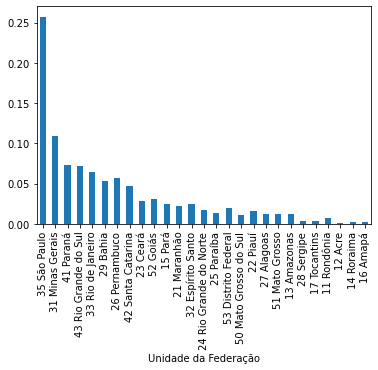

In [19]:
gastos_proporcionais.plot.bar()

Para corrigir os dados pela população de cada estado, usaremos as [estimativas do IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados).

In [20]:
ibge_estimativa = pd.read_excel('dados/estimativa_dou_2020.xls')
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


Outra opção, pegar do [wikipedia](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)

In [2]:
dados_da_populacao = """Posição 	Unidade federativa 	População 	% da pop. total 	País comparável

(habitantes)
1 	 São Paulo 	46 289 333 	21,9% 	Flag of Spain.svg Espanha (46 439 864)
2 	 Minas Gerais 	21 292 666 	10,1% 	Sri Lanka (20 675 000)
3 	 Rio de Janeiro 	17 366 189 	8,2% 	 Países Baixos (16 922 900)
4 	Bahia Bahia 	14 930 634 	7,1% 	Chade (14 037 000)
5 	 Paraná 	11 516 840 	5,4% 	 Bolívia (11 410 651)
6 	 Rio Grande do Sul 	11 422 973 	5,4% 	 Bélgica (11 250 659)
7 	 Pernambuco 	9 616 621 	4,5% 	 Bielorrússia (9 485 300)
8 	 Ceará 	9 187 103 	4,3% 	 Emirados Árabes Unidos (9 157 000)
9 	Pará Pará 	8 690 745 	4,1% 	 Áustria (8 602 112)
10 	 Santa Catarina 	7 252 502 	3,4% 	 Sérvia (7 114 393)
11 	 Maranhão 	7 114 598 	3,4% 	 Paraguai (7 003 406)
12 	 Goiás 	7 113 540 	3,4% 	 Paraguai (7 003 406)
13 	 Amazonas 	4 207 714 	2,0% 	Líbano (4 168 000)
14 	 Espírito Santo 	4 064 052 	1,9% 	Líbano (4 168 000)
15 	 Paraíba 	4 039 277 	1,9% 	Líbano (4 168 000)
16 	 Rio Grande do Norte 	3 534 165 	1,7% 	Uruguai (3 415 866)
17 	 Mato Grosso 	3 526 220 	1,7% 	Uruguai (3 415 866)
18 	 Alagoas 	3 351 543 	1,6% 	Uruguai (3 415 866)
19 	 Piauí 	3 281 480 	1,6% 	Kuwait (3 268 431)
20 	 Distrito Federal 	3 055 149 	1,4% 	 Lituânia (2 900 787)
21 	 Mato Grosso do Sul 	2 809 394 	1,3% 	 Jamaica (2 717 991)
22 	 Sergipe 	2 318 822 	1,1% 	Namíbia (2 280 700)
23 	 Rondônia 	1 796 460 	0,8% 	Gabão (1 725 000)
24 	 Tocantins 	1 590 248 	0,7% 	 Bahrein (1 359 800)
25 	 Acre 	894 470 	0,4% 	Fiji (859 178)
26 	 Amapá 	861 773 	0,4% 	Fiji (859 178)
27 	 Roraima 	631 181 	0,3% 	 Luxemburgo (562 958) """

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

Curiosidades: entrando no link dos mapas do brasil na wikipedia, cheguei [neste artigo](https://journals.openedition.org/confins/3483) muito interessante sobre representação cartográfica.

In [22]:
#criar stream para a string

from io import StringIO
dados_da_populacao_io = StringIO(dados_da_populacao)

pd.read_csv(dados_da_populacao_io, sep='\t')

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


In [3]:
from io import StringIO
dados_da_populacao_io = StringIO(dados_da_populacao)
populacao = pd.read_csv(dados_da_populacao_io, sep='\t',skiprows=0, index_col=0, usecols=[1,2], names=['uf', 'populacao'])
populacao.drop('Unidade federativa ', inplace=True)
populacao.dropna(inplace=True)
populacao.index = populacao.index.str.strip()
populacao.populacao = populacao.populacao.str.strip().replace(' ','', regex=True).astype('int64')
# falta tirar esse NaN e ajustar os numeros. tem como fazer por dentro do csv?
populacao

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará Pará,8690745


In [4]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [5]:
for estado in gastos_do_mais_recente.index:
    populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [6]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


### Desafios 

Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

Desafio 02 - Neste desafio temos uma série de passos:

- Padronizar os nomes das colunas
- Transformar os dados nos tipos corretos
- Transformar a UF em index

Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [27]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html?highlight=read_html#pandas.read_html

# html_pop = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
# html_pop

In [28]:
# html_pop[0].head()

## 02. Proporcionalidades e Seaborn

- Visualização, Seaborn e Proporcionalidades
- Resolvendo o Super Desafio da Aula

In [29]:
ordenado_por_total['2020/Jul']

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
29 Bahia                  58.90
26 Pernambuco             62.33
42 Santa Catarina         51.76
23 Ceará                  30.81
52 Goiás                  33.50
15 Pará                   27.62
21 Maranhão               24.37
32 Espírito Santo         27.46
24 Rio Grande do Norte    19.59
25 Paraíba                15.49
53 Distrito Federal       22.23
50 Mato Grosso do Sul     12.51
22 Piauí                  18.02
27 Alagoas                13.09
51 Mato Grosso            13.08
13 Amazonas               13.36
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
12 Acre                    1.16
14 Roraima                 2.74
16 Amapá                   2.16
Name: 2020/Jul, dtype: float64

In [30]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,...,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
31 Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,...,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
33 Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,...,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54


In [31]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos, dados, mes: str):
    gastos_do_mais_recente = todos_os_gastos[mes]
    dados[f'gastos_{mes}'] = gastos_do_mais_recente * 1000000
    dados[f'gasto_por_habitante_{mes}'] = dados[f'gastos_{mes}'] / dados['populacao']

In [32]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]

In [33]:
# gastos_e_populacao_recente['gastos'] = gastos_e_populacao_recente['2020/Jul'] *1000000

insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Jul')
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Mai')
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul,gastos_2020/Mai,gasto_por_habitante_2020/Mai
uf,,,,,,
São Paulo,46289333,282.71,282709570.31,6.11,302857660.98,6.54
Minas Gerais,21292666,120.47,120467187.34,5.66,136867275.75,6.43
Rio de Janeiro,17366189,71.54,71540227.33,4.12,86281033.16,4.97
Bahia,14930634,58.90,58898100.40,3.94,61756775.71,4.14
Paraná,11516840,80.32,80320852.69,6.97,106103737.62,9.21


<AxesSubplot:xlabel='uf'>

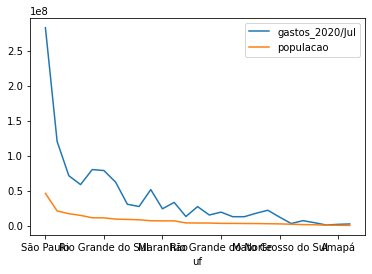

In [34]:
gastos_e_populacao_recente[['gastos_2020/Jul', 'populacao']].plot()

In [35]:
gastos_e_populacao_recente.loc[['Rio Grande do Sul', 'São Paulo']]

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul,gastos_2020/Mai,gasto_por_habitante_2020/Mai
uf,,,,,,
Rio Grande do Sul,11422973,78.93,78929703.81,6.91,86076113.42,7.54
São Paulo,46289333,282.71,282709570.31,6.11,302857660.98,6.54


In [36]:
# gastos_e_populacao_recente['gasto_por_habitante'] = gastos_e_populacao_recente['gastos'] / gastos_e_populacao_recente['populacao']
# gastos_e_populacao_recente.head()

<AxesSubplot:xlabel='uf'>

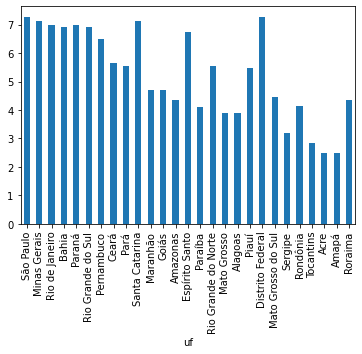

In [37]:
# ordenação de estados que mais gastam
gastos_e_populacao_recente['gasto_por_habitante_2020/Jul'].plot.bar()
##DESAFIOS
#ordenando por gasto per capita
gastos_e_populacao_recente['gasto_por_habitante_2020/Jul'].sort_values(ascending=False).plot(kind='bar')

#ordenando por habitantes
gastos_e_populacao_recente.sort_values(by= 'populacao',ascending=False)['gasto_por_habitante_2020/Jul'].plot(kind='bar')

<Figure size 504x504 with 0 Axes>

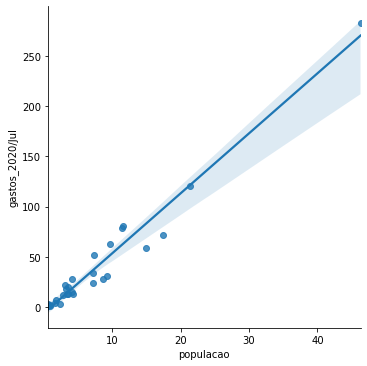

In [38]:
plt.figure(figsize=(7,7))
sns.lmplot(data=gastos_e_populacao_recente/1000000, x='populacao', y='gastos_2020/Jul')

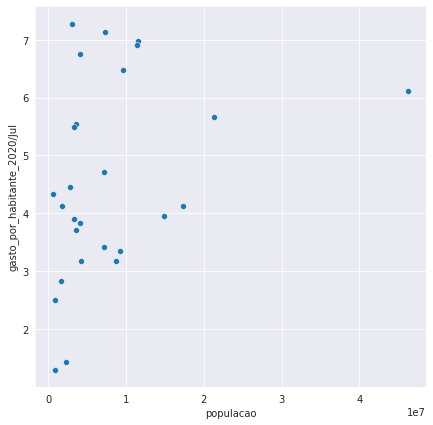

In [24]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(7,7))
    
    sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante_2020/Jul')

In [39]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Jun')
gastos_e_populacao_recente

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul,gastos_2020/Mai,gasto_por_habitante_2020/Mai,gastos_2020/Jun,gasto_por_habitante_2020/Jun
uf,,,,,,,,
São Paulo,46289333,282.71,282709570.31,6.11,302857660.98,6.54,299060851.62,6.46
Minas Gerais,21292666,120.47,120467187.34,5.66,136867275.75,6.43,135977571.87,6.39
Rio de Janeiro,17366189,71.54,71540227.33,4.12,86281033.16,4.97,77604925.21,4.47
Bahia,14930634,58.90,58898100.40,3.94,61756775.71,4.14,65159300.63,4.36
Paraná,11516840,80.32,80320852.69,6.97,106103737.62,9.21,92901461.36,8.07
Rio Grande do Sul,11422973,78.93,78929703.81,6.91,86076113.42,7.54,89019478.82,7.79
Pernambuco,9616621,62.33,62325444.34,6.48,65424719.40,6.80,68145110.59,7.09
Ceará,9187103,30.81,30809221.22,3.35,54200339.48,5.90,42146555.81,4.59
Pará,8690745,27.62,27618727.51,3.18,41248502.78,4.75,35396030.78,4.07


### Desafios

Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

ATENÇÃO: No próximo vídeo Gui e Thiago resolvem parte do Desafio 2 e 3, aconselhamos fortemente que gastem um tempo tentando resolver antes de assistir o vídeo.

Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

<AxesSubplot:xlabel='populacao', ylabel='gastos_2020/Jul'>

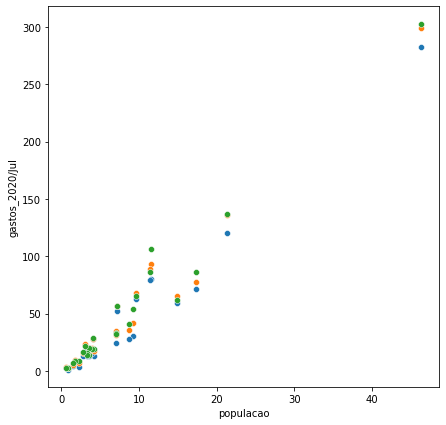

In [26]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente /1000000, x='populacao', y='gastos_2020/Jul')
sns.scatterplot(data=gastos_e_populacao_recente /1000000, x='populacao', y='gastos_2020/Jun')
sns.scatterplot(data=gastos_e_populacao_recente /1000000, x='populacao', y='gastos_2020/Mai')

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante_2020/Jul'>

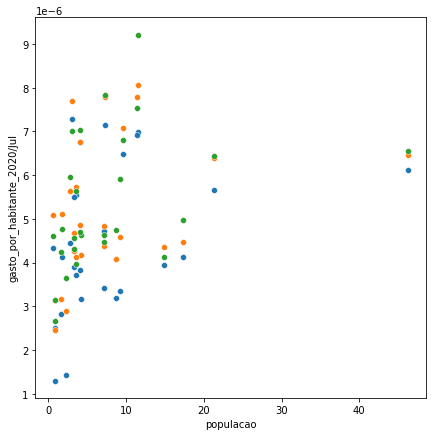

In [27]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente /1000000, x='populacao', y='gasto_por_habitante_2020/Jul')
sns.scatterplot(data=gastos_e_populacao_recente /1000000, x='populacao', y='gasto_por_habitante_2020/Jun')
sns.scatterplot(data=gastos_e_populacao_recente /1000000, x='populacao', y='gasto_por_habitante_2020/Mai')

## 03. Ticks, escalas e formatação de imagens

- Formatação de ticks e escalas

In [40]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,...,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,...,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,...,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54


Podemos usar sem o data, sem o dataframe, apenas passando listas nos argumentos x e y.
Três versões equivalentes abaixo:

<AxesSubplot:ylabel='São Paulo'>

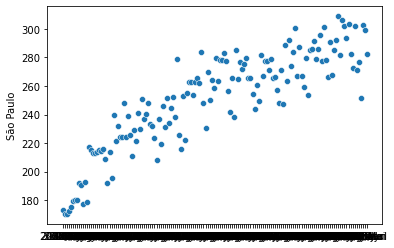

In [41]:
sns.scatterplot(data=ordenado_por_total.loc['São Paulo'])

<AxesSubplot:ylabel='São Paulo'>

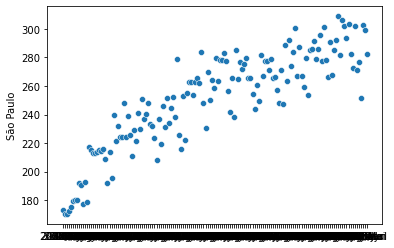

In [31]:
sns.scatterplot(x=ordenado_por_total.columns, y= ordenado_por_total.loc['São Paulo'])

In [42]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


<AxesSubplot:ylabel='São Paulo'>

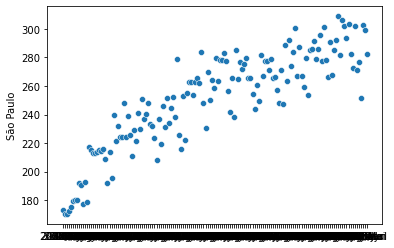

In [34]:
sns.scatterplot(data=mensal, x=mensal.index, y='São Paulo')

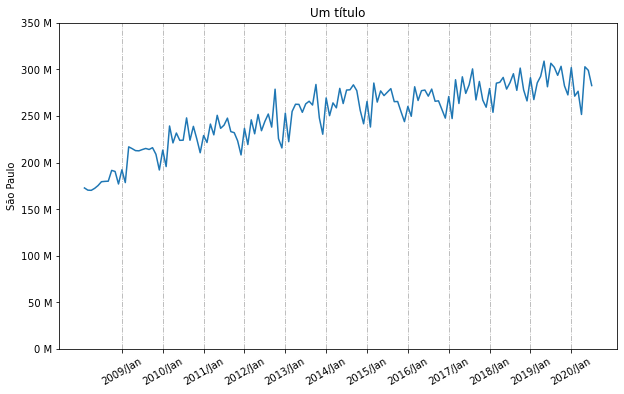

In [55]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)

#desafio deixar eixo y em milhões
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f} M'))

ax.xaxis.set_major_locator(ticker.IndexLocator(base= 12, offset=11))
plt.ylim(0,350)
plt.grid(True, axis='x', linestyle='-.')
plt.title('Um título')
plt.show()

### Desafios

Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

Você pode baixar o notebook da aula neste [link](https://github.com/alura-cursos/agendamento-hospitalar-2/blob/main/Bootcamp_Data_Science_Hospitalar_6.ipynb), não deixe de tentar resolver os exercícios e compartilhar seus resultados e dúvidas no Discord do Bootcamp.

## 04. Trabalhando DateTime e Melt

- Datas com Datetime
- Manipulação de dados com Melt

In [2]:
import datetime
# from datetime import date

In [9]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

In [3]:
datetime.datetime(2020,11,3)

datetime.datetime(2020, 11, 3, 0, 0)

In [59]:
date.today()

datetime.date(2021, 6, 4)

In [49]:
mensal.index.map(lambda x: (datetime.datetime.strptime(x, '%Y/%b')).date())
#ou em datetime mesmo
mensal.index.map(lambda x: (datetime.datetime.strptime(x, '%Y/%b')))

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01,
       2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01],
      dtype='object', length=150)

Plot agora com eixo x formatado como data

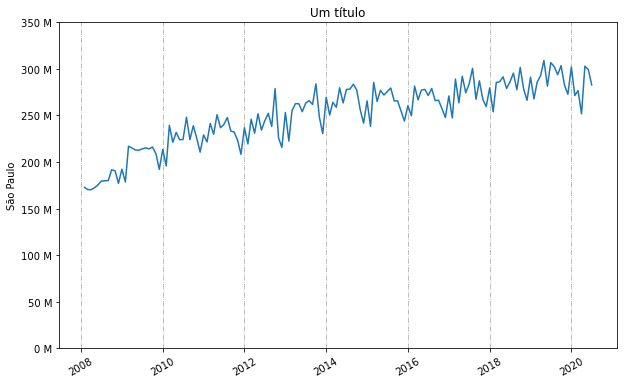

In [52]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index.map(lambda x: (datetime.datetime.strptime(x, '%Y/%b')).date()), y='São Paulo')
plt.xticks(rotation=30)

#desafio deixar eixo y em milhões
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f} M'))

# ax.xaxis.set_major_locator(ticker.IndexLocator(base= 12, offset=11))
plt.ylim(0,350)
plt.grid(True, axis='x', linestyle='-.')
plt.title('Um título')
plt.show()

In [53]:
# atualizando index pra ficar igual ao código das aulas
mensal.index = mensal.index.map(lambda x: (datetime.datetime.strptime(x, '%Y/%b')).date())

In [58]:
mensal.index[0]

datetime.date(2008, 2, 1)

In [59]:
#melting
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping

mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)

,index,Unidade da Federação,value
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42
...,...,...,...
4045,2020-03-01,Amapá,2.29
4046,2020-04-01,Amapá,1.77
4047,2020-05-01,Amapá,2.70
4048,2020-06-01,Amapá,2.70


In [17]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['dia_mes_ano', 'uf', 'gasto']
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


In [61]:
mensal_aberto.shape

(4050, 3)

In [9]:
## desafio voltar atrás.
mensal_aberto.pivot(index='dia_mes_ano', columns='uf', values='gasto')

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
dia_mes_ano,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,...,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,...,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,...,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,...,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,...,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,2.86,16.00,2.29,14.77,70.34,46.40,19.41,26.56,34.56,28.83,...,15.32,20.94,84.65,73.59,7.17,2.81,56.71,9.19,276.61,7.03
2020-04-01,2.47,14.24,1.77,16.33,59.11,43.47,18.12,23.74,27.50,23.94,...,11.88,17.32,76.29,68.16,7.42,2.30,51.18,8.40,251.70,6.20
2020-05-01,2.38,15.25,2.70,19.44,61.76,54.20,21.44,28.61,31.87,32.98,...,14.18,19.92,86.08,86.28,8.58,2.91,56.84,8.45,302.86,6.73


In [10]:
mensal_pivot = mensal_aberto.pivot_table(index = 'dia_mes_ano', values = 'gasto', columns = 'uf')
mensal_pivot.index.name = None
mensal_pivot.columns.name = None
mensal_pivot.head()

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,...,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,...,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,...,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,...,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,...,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


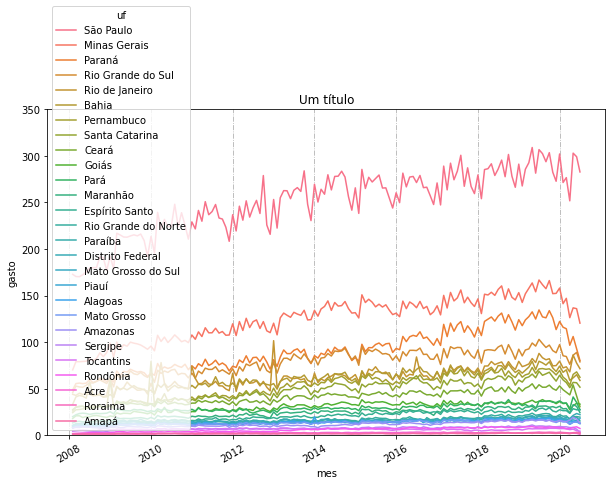

In [65]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x='dia_mes_ano', y='gasto', hue='uf')
plt.xticks(rotation=30)

# #desafio deixar eixo y em milhões
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f} M'))

# ax.xaxis.set_major_locator(ticker.IndexLocator(base= 12, offset=11))
plt.ylim(0,350)
plt.grid(True, axis='x', linestyle='-.')
plt.title('Um título')
plt.show()

desafio:
melhorar o gráfico
- muitos estados
- usar palettes seaborn: https://seaborn.pydata.org/tutorial/color_palettes.html
- legenda

In [ ]:
# não daria pra fazer esse gráfico sem todas essas alterações?

<AxesSubplot:>

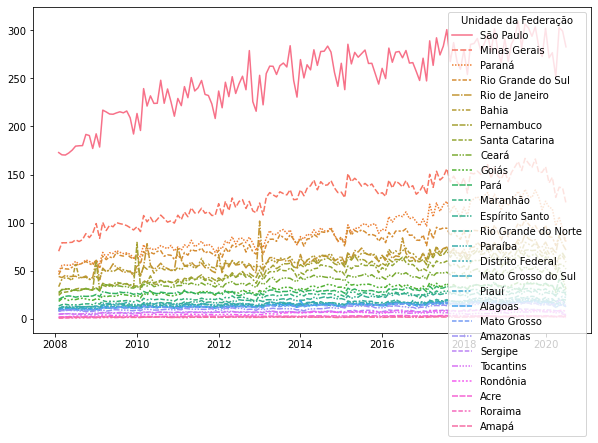

In [70]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mensal)

Conclusão

https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot

*datapandas.DataFrame, numpy.ndarray, mapping, or sequence:*

*Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.*

Então, esse trabalho que fizemos é o que o pandas faz por baixo dos panos ao passar a tabela wide-form data=data


Aqui isso é bem explicado
https://seaborn.pydata.org/tutorial/data_structure.html


-----

Comentário enviado no grupo

Boa tarde gente ! Assistindo a aula "Manipulação de dados com Melt" da parte 4, fiquei curioso que daria pra ter chego num gráfico muito parecido apenas usando `sns.lineplot(data=mensal)`, ao invés de fazer toda as operações com melt no novo dataframe (mensal_aberto). Então fui pesquisar e pelo que entendi, ao chamar `sns.lineplot(data=mensal)` no fundo o pandas tá fazendo as operações que fizemos na mão, e por isso o resultado é parecido, apesar de ter algumas desvantagens. Caso alguém também tenha se perguntado sobre isso, vou deixar aqui uma página do seaborn que explica essa diferença entre dados no formato "wide" e "long": https://seaborn.pydata.org/tutorial/data_structure.html

----

Pivot_table e pivot diferenças - https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping

While pivot() provides general purpose pivoting with various data types (strings, numerics, etc.), pandas also provides pivot_table() for pivoting with aggregation of numeric data.

The function pivot_table() can be used to create spreadsheet-style pivot tables. See the cookbook for some advanced strategies.

### Desafios

Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

Desafio 03: Melhorar o gráfico da distribuição do gráfico:

    Escolha apenas alguns estados.
    Mude a palete de cores.
    Posicione a legenda de forma mais adequada.
    Adicione título principal e nos eixos x e y.

Você pode baixar o notebook das aulas nestes links vídeo 4.1 e vídeo 4.2, não deixe de tentar resolver os exercícios e compartilhar seus resultados e dúvidas no Discord do Bootcamp.

## 05. Manipulando datas e gerando novas análises

- Comparando gastos ano a ano

Continuando, com os dados desestruturados, desnormalizados (no léxico do SQL), devido a repetição de palavras, como São Paulo.

exemplo: visualizações do obervatorio covid - https://covid19br.github.io

In [27]:
mensal_aberto['dia_mes_ano'][0]

Timestamp('2008-02-01 00:00:00')

In [24]:
mensal_aberto['dia_mes_ano'].head()

0   2008-02-01
1   2008-03-01
2   2008-04-01
3   2008-05-01
4   2008-06-01
Name: dia_mes_ano, dtype: datetime64[ns]

In [31]:
# mensal_aberto.head()
mensal_aberto['dia_mes_ano'].dt.year

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
4045    2020
4046    2020
4047    2020
4048    2020
4049    2020
Name: dia_mes_ano, Length: 4050, dtype: int64

Comparando os anos com o datetime

In [50]:
mensal_aberto['dia_mes_ano'].dt.strftime("%B").str.title()

In [32]:
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year
mensal_aberto['mes_string'] = mensal_aberto['dia_mes_ano'].dt.strftime("%B").str.title()
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


In [56]:
mensal_aberto['mes_string'][11:23]

11      Janeiro
12    Fevereiro
13        Março
14        Abril
15         Maio
16        Junho
17        Julho
18       Agosto
19     Setembro
20      Outubro
21     Novembro
22     Dezembro
Name: mes_string, dtype: object

In [51]:
mensal_aberto.query("uf=='São Paulo'")

,dia_mes_ano,uf,gasto,mes,ano,mes_string
0,2008-02-01,São Paulo,172.83,2,2008,Fevereiro
1,2008-03-01,São Paulo,170.48,3,2008,Março
2,2008-04-01,São Paulo,170.28,4,2008,Abril
3,2008-05-01,São Paulo,172.40,5,2008,Maio
4,2008-06-01,São Paulo,175.42,6,2008,Junho
...,...,...,...,...,...,...
145,2020-03-01,São Paulo,276.61,3,2020,Março
146,2020-04-01,São Paulo,251.70,4,2020,Abril
147,2020-05-01,São Paulo,302.86,5,2020,Maio
148,2020-06-01,São Paulo,299.06,6,2020,Junho


<ipython-input-64-db92a78501e5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(mensal_aberto['mes_string'][10:23:2])


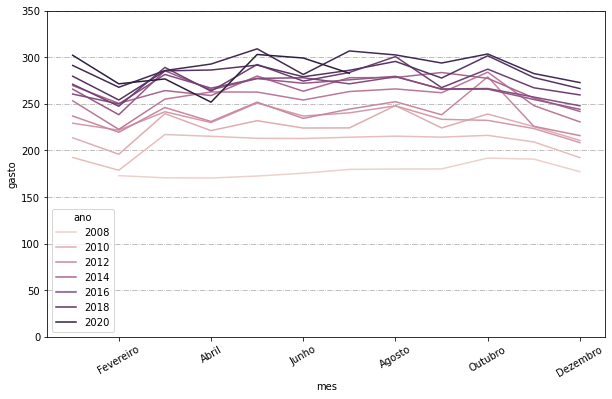

In [64]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x='mes' , y='gasto', hue='ano') # ou x='mes_string'
ax.xaxis.set_ticklabels(mensal_aberto['mes_string'][10:23:2])
plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(axis='y', linestyle='-.')
plt.show()

In [75]:
meses = [i for i in range(1,13)]
dias_nos_meses = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

dias_por_mes = dict(zip(meses, dias_nos_meses))
dias_por_mes


{1: 31,
 2: 28,
 3: 31,
 4: 30,
 5: 31,
 6: 30,
 7: 31,
 8: 31,
 9: 30,
 10: 31,
 11: 30,
 12: 31}

In [86]:
# pra complementar fevereiro 28 ou 29
dias_por_mes_sem_fevereiro = dict(dias_por_mes)

In [88]:
del dias_por_mes_sem_fevereiro[2]

In [ ]:
dias_por_mes_sem_fevereiro[2] = 28 if

In [89]:
dias_por_mes_sem_fevereiro

{1: 31,
 3: 31,
 4: 30,
 5: 31,
 6: 30,
 7: 31,
 8: 31,
 9: 30,
 10: 31,
 11: 30,
 12: 31}

In [92]:
mensal_aberto['mes'].map(dias_por_mes_sem_fevereiro)

0        NaN
1      31.00
2      30.00
3      31.00
4      30.00
        ... 
4045   31.00
4046   30.00
4047   31.00
4048   30.00
4049   31.00
Name: mes, Length: 4050, dtype: float64

In [79]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,mes_string,diario,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,Fevereiro,6.17,6.17
1,2008-03-01,São Paulo,170.48,3,2008,Março,5.50,5.50
2,2008-04-01,São Paulo,170.28,4,2008,Abril,5.68,5.68
3,2008-05-01,São Paulo,172.40,5,2008,Maio,5.56,5.56
4,2008-06-01,São Paulo,175.42,6,2008,Junho,5.85,5.85


<ipython-input-84-b5bf317581e9>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(mensal_aberto['mes_string'][10:23:2])


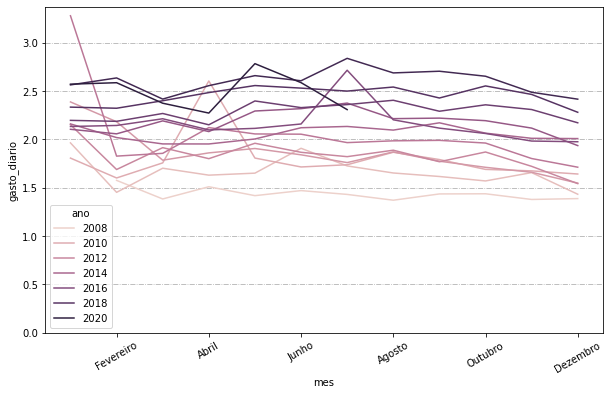

In [84]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Rio de Janeiro'"), x='mes' , y='gasto_diario', hue='ano') # ou x='mes_string'
ax.xaxis.set_ticklabels(mensal_aberto['mes_string'][10:23:2])
plt.xticks(rotation=30)
plt.ylim(0)
plt.grid(axis='y', linestyle='-.')
plt.show()

### Desafios

Desafio 01: Melhorar o gráfico ano a ano:

Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

Você pode baixar o notebook da aula neste link, não deixe de tentar resolver os exercícios e compartilhar seus resultados e dúvidas no Discord do Bootcamp.

## 06. Agrupando dados e analisando por categoria

- Avançando em pandas e seaborn
- Conclusão

In [93]:
estado_a_analisar = mensal_aberto.query("uf=='Bahia'")
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,mes_string,diario,gasto_diario
750,2008-02-01,Bahia,33.41,2,2008,Fevereiro,1.19,1.19
751,2008-03-01,Bahia,41.30,3,2008,Março,1.33,1.33
752,2008-04-01,Bahia,42.83,4,2008,Abril,1.43,1.43
753,2008-05-01,Bahia,42.07,5,2008,Maio,1.36,1.36
754,2008-06-01,Bahia,39.91,6,2008,Junho,1.33,1.33


In [97]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

,gasto,mes,diario,gasto_diario
ano,,,,
2008,468.99,77,15.42,15.42
2009,587.24,78,19.30,19.30
2010,610.27,78,20.06,20.06
2011,658.47,78,21.65,21.65
2012,678.91,78,22.32,22.32


<AxesSubplot:ylabel='gasto'>

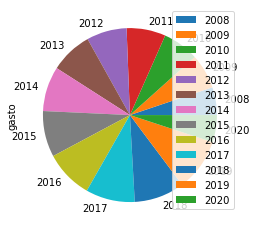

In [98]:
gastos_por_ano.plot(kind='pie', y='gasto')

In [138]:
list(axs.values())

[<AxesSubplot:label='b', xlabel='ano', ylabel='gasto'>,
 <AxesSubplot:label='c', xlabel='ano', ylabel='gasto'>,
 <AxesSubplot:label='a', xlabel='ano', ylabel='gasto'>]

In [152]:
(axs['a'].get_gridspec())

GridSpec(2, 2)

In [171]:
gastos_por_ano.gasto.sort_values().index

Int64Index([2020, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019],
           dtype='int64', name='ano')

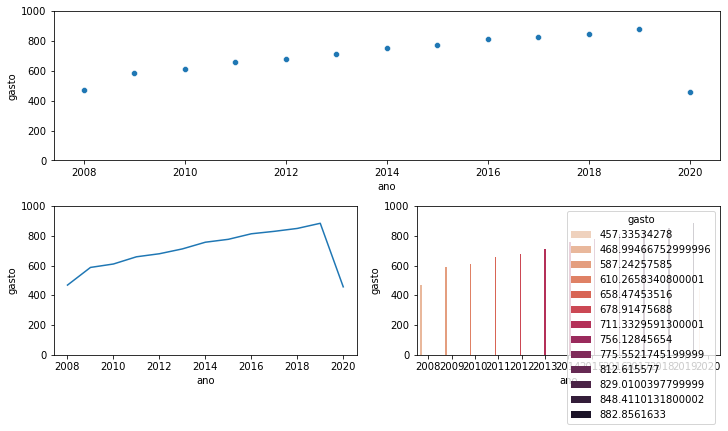

In [177]:
fig, axs = plt.subplot_mosaic(layout="""aa
                           bc""", constrained_layout=True, figsize=(10,6))

sns.scatterplot(ax=axs['a'], data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')#, hue=gastos_por_ano.index, palette='tab20c')
sns.lineplot(ax=list(axs.values())[0], data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')
sns.barplot(ax=list(axs.values())[1], data=gastos_por_ano, x=gastos_por_ano.index, y='gasto', palette=sns.color_palette('rocket_r', 13))
            #hue=gastos_por_ano.gasto,       
            #hue_order=gastos_por_ano.gasto.sort_values().index.to_list())

for ax in list(axs.values()):
    ax.set_ylim(0,1000)
    
# desafio tom de cor ordenado

In [181]:
estados = ['Amazonas', 'Paraná', 'Bahia']
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(['uf','ano']).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,diario,gasto_diario
0,Amazonas,2008,91.28,77,3.01,3.01
1,Amazonas,2009,106.49,78,3.50,3.50
2,Amazonas,2010,114.18,78,3.75,3.75
3,Amazonas,2011,120.26,78,3.96,3.96
4,Amazonas,2012,122.92,78,4.04,4.04


<AxesSubplot:xlabel='ano', ylabel='gasto'>

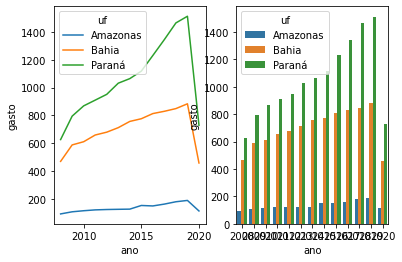

In [185]:
fig, ax = plt.subplots(1,2)
sns.barplot(ax=ax[1], data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')
sns.lineplot(ax=ax[0], data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')

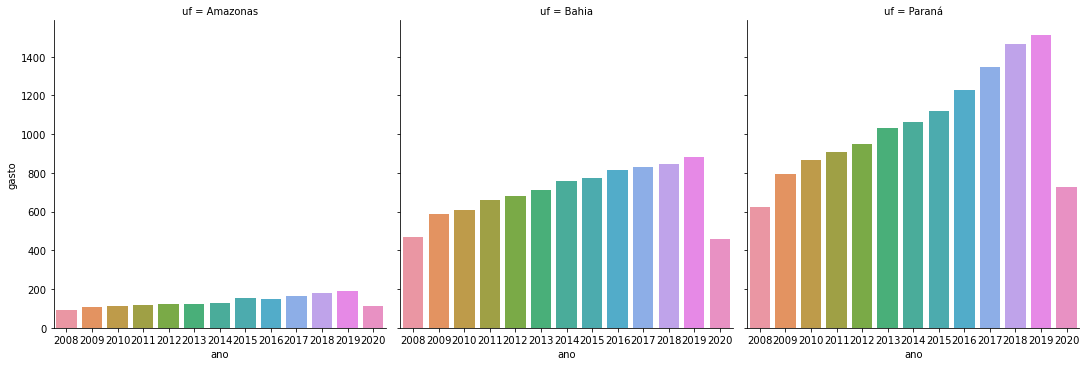

In [193]:
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', kind='bar', col='uf')

Funções gráficas de mais alto nível: https://seaborn.pydata.org/api.html
Que já chamam outras por dentro

### Desafios

Desafio 01: Reordenar as cores pelo valor do eixo y.

Desafio 02: Explorar a documentação do Seaborn.

Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.

Você pode baixar o notebook da aula neste [link](https://github.com/alura-cursos/agendamento-hospitalar-2/blob/main/Bootcamp_Data_Science_Hospitalar_11.ipynb), não deixe de tentar resolver os exercícios e compartilhar seus resultados e dúvidas no Discord do Bootcamp.


# Checkpoint

Resumo de variáveis criadas e alteradas, para poder partir daqui tem precisar rodar o notebook todo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

dados2 = pd.read_csv('dados/A160324189_28_143_208.csv', encoding="ISO-8859-1", 
            skiprows = 3, sep = ";", skipfooter = 12,
           thousands=".", decimal = ",", engine="python")

colunas_usaveis = dados2.mean().index.tolist() # .index retorna um imutável, por isso convertemos pra lista
colunas_usaveis.insert(0, "Unidade da Federação")

usaveis = dados2[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)

usaveis['Total'] = usaveis.sum(axis=1)

ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)

colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 1000000

gastos_do_mais_recente = ordenado_por_total.iloc[:,-1]

## modulo 2

gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
ibge_estimativa = pd.read_excel('dados/estimativa_dou_2020.xls')

dados_da_populacao = """Posição 	Unidade federativa 	População 	% da pop. total 	País comparável

(habitantes)
1 	 São Paulo 	46 289 333 	21,9% 	Flag of Spain.svg Espanha (46 439 864)
2 	 Minas Gerais 	21 292 666 	10,1% 	Sri Lanka (20 675 000)
3 	 Rio de Janeiro 	17 366 189 	8,2% 	 Países Baixos (16 922 900)
4 	Bahia Bahia 	14 930 634 	7,1% 	Chade (14 037 000)
5 	 Paraná 	11 516 840 	5,4% 	 Bolívia (11 410 651)
6 	 Rio Grande do Sul 	11 422 973 	5,4% 	 Bélgica (11 250 659)
7 	 Pernambuco 	9 616 621 	4,5% 	 Bielorrússia (9 485 300)
8 	 Ceará 	9 187 103 	4,3% 	 Emirados Árabes Unidos (9 157 000)
9 	Pará Pará 	8 690 745 	4,1% 	 Áustria (8 602 112)
10 	 Santa Catarina 	7 252 502 	3,4% 	 Sérvia (7 114 393)
11 	 Maranhão 	7 114 598 	3,4% 	 Paraguai (7 003 406)
12 	 Goiás 	7 113 540 	3,4% 	 Paraguai (7 003 406)
13 	 Amazonas 	4 207 714 	2,0% 	Líbano (4 168 000)
14 	 Espírito Santo 	4 064 052 	1,9% 	Líbano (4 168 000)
15 	 Paraíba 	4 039 277 	1,9% 	Líbano (4 168 000)
16 	 Rio Grande do Norte 	3 534 165 	1,7% 	Uruguai (3 415 866)
17 	 Mato Grosso 	3 526 220 	1,7% 	Uruguai (3 415 866)
18 	 Alagoas 	3 351 543 	1,6% 	Uruguai (3 415 866)
19 	 Piauí 	3 281 480 	1,6% 	Kuwait (3 268 431)
20 	 Distrito Federal 	3 055 149 	1,4% 	 Lituânia (2 900 787)
21 	 Mato Grosso do Sul 	2 809 394 	1,3% 	 Jamaica (2 717 991)
22 	 Sergipe 	2 318 822 	1,1% 	Namíbia (2 280 700)
23 	 Rondônia 	1 796 460 	0,8% 	Gabão (1 725 000)
24 	 Tocantins 	1 590 248 	0,7% 	 Bahrein (1 359 800)
25 	 Acre 	894 470 	0,4% 	Fiji (859 178)
26 	 Amapá 	861 773 	0,4% 	Fiji (859 178)
27 	 Roraima 	631 181 	0,3% 	 Luxemburgo (562 958) """

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

from io import StringIO
dados_da_populacao_io = StringIO(dados_da_populacao)
populacao = pd.read_csv(dados_da_populacao_io, sep='\t',skiprows=0, index_col=0, usecols=[1,2], names=['uf', 'populacao'])
populacao.drop('Unidade federativa ', inplace=True)
populacao.dropna(inplace=True)
populacao.index = populacao.index.str.strip()
populacao.populacao = populacao.populacao.str.strip().replace(' ','', regex=True).astype('int64')
# falta tirar esse NaN e ajustar os numeros. tem como fazer por dentro do csv?
populacao

gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
for estado in gastos_do_mais_recente.index:
    populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)
populacao.index

gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)

def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos, dados, mes: str):
    gastos_do_mais_recente = todos_os_gastos[mes]
    dados[f'gastos_{mes}'] = gastos_do_mais_recente * 1000000
    dados[f'gasto_por_habitante_{mes}'] = dados[f'gastos_{mes}'] / dados['populacao']
    
ordenado_por_total.index = ordenado_por_total.index.str[3:]

insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Jul')
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Jun')
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Mai')

mensal = ordenado_por_total.T

import datetime
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

mensal.index = mensal.index.map(lambda x: (datetime.datetime.strptime(x, '%Y/%b')).date())

mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['dia_mes_ano', 'uf', 'gasto']
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')


meses = [i for i in range(1,13)]
dias_nos_meses = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dias_por_mes = dict(zip(meses, dias_nos_meses))
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)

# Anotações

In [ ]:
# pd.options.display.float_format = "{:.2f}".format

Entender melhor essas coisas de formação de números, ainda me perco um pouco
https://docs.python.org/3/library/string.html#formatspec